In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse
import sklearn.linear_model as lm 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.svm import LinearSVC

## SVM

In [ ]:
#the sales channel (Hotel/Restaurant/Cafe = 1 vs. Retail = 2) 
#the region (Lisbon = 1, Oporto = 2, or Other = 3) of the retailer

### Linear SVM

In [7]:
df_svm = pd.read_csv('wholesale-customers.csv', sep=',')
df_svm.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [8]:
from sklearn import svm, grid_search
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm

In [9]:
X = df_svm.iloc[:,1:]
y = df_svm.iloc[:,:1]

In [10]:
X.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [11]:
y.head()

,Channel
0,2
1,2
2,2
3,1
4,2


In [13]:
transformed_y = (-1)**y
transformed_y.head()

,Channel
0,1
1,1
2,1
3,-1
4,1


In [14]:
standardized_X_values = preprocessing.scale(X)
standardized_X = pd.DataFrame(data = standardized_X_values)
standardized_X.columns = X.columns.values
standardized_X.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [24]:
svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)

scores = list()
#scores_std = list()
for C in C_s:
    svc.C = C
    cv_scores = cross_val_score(svc, standardized_X, np.ravel(y), cv=10, n_jobs=-1)
    scores.append(np.mean(cv_scores))

In [19]:
scores

[0.677307963354475,
 0.677307963354475,
 0.677307963354475,
 0.677307963354475,
 0.677307963354475,
 0.677307963354475,
 0.6795806906272024,
 0.8318287526427062,
 0.8999741602067184,
 0.9022515856236787]

In [26]:
best_c = Cs[np.argmax(scores)]
best_c

1.0

Text(0.5, 1.0, 'Linear SVM Cross-Validation Accuracy vs Hypermeter C')

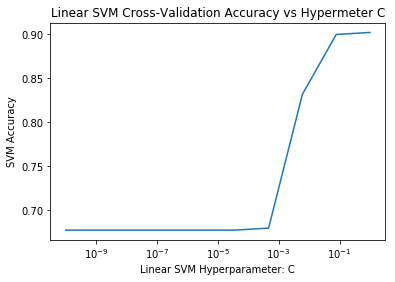

In [21]:
 _, ax = plt.subplots(1,1)
ax.semilogx(Cs, scores)
plt.ylabel("SVM Accuracy")
plt.xlabel("Linear SVM Hyperparameter: C")
plt.title("Linear SVM Cross-Validation Accuracy vs Hypermeter C")

In [27]:
l_svm = svm.SVC(kernel='linear', C= 1)
model = l_svm.fit(standardized_X, np.ravel(y))

In [28]:
linearsvm_coefficients_array = np.append(model.coef_, model.intercept_)
indices = np.append(standardized_X.columns,"intercept")
linearsvm_coefficients = pd.DataFrame(linearsvm_coefficients_array,index = indices).rename(columns = {0: "coefficients"})
linearsvm_coefficients

,coefficients
Region,0.236901
Fresh,0.035426
Milk,0.346780
Grocery,0.512052
Frozen,-0.281653
Detergents_Paper,2.556616
Delicassen,-0.220582
intercept,0.023486
